In [1]:
#!pip install pmdarima
#!pip install statsmodels
#!pip install haversine
!pip install Pillow
import pandas as pd
from pmdarima.arima.utils import ndiffs
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from numpy import log
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt
from pmdarima.arima.utils import ndiffs
from numpy import mean
from haversine import haversine, Unit
from statistics import mean
import os, glob
import statsmodels.api as sm
import datetime
from PIL import Image

Defaulting to user installation because normal site-packages is not writeable


## Some future considerations 

Could do a count of data for the breeding months located at approximately flatey... and westman

could apply Box Plot https://pythonguides.com/matplotlib-time-series-plot/

## Atlantic Puffins


- Chicks are bread on Flatey Island. Since 2005 there has been a large decrease. According to national geographic [1] "warming waters and earlier thaws are driving away the seabird' (Puffin's) prey, unseasonal storms; and knocking tigh breeding schedules off-kilter." Further issues with carbon dioxide and dilution from glaxiers are changing the aquatic balance.

- Aevar Paterson a retired Icelandic Institute of Hatural History ornithologost states the issue is "climate change", written in 2014

- Seabirds can give an update for the health of the oceans said Jennider Procehcner a doctoral student at Carleton University of Ottawa

- Westman island is another important breeding ground. No decent chick production for 12 years (says Hansen, biologist with the South Iceland Nature Centre)

- Hansen also spoke that there was a historic water trend that linked Puffin hunting records with a periodic watming cycle called Atlantic Multidecadel Oscillation or AMO, and it started in 1990s, and is due to end in 2030

- Puffins use burrows for their egs and are usuaully active by JULY

- DIet - Sandeel - important for chicks. Warmer waters stunt their growth. Now mackerels are moving into the area, and Puffins are forced to fly further to hunt. 

- Spend 3-4 month on Iceland (May - late August), and the rest out at sea northern, coming to shore for breeding 

- Puffling takes 6 weeks to mature
- Average lifespan of 20 - 25 years 

- Iceland review[2] in 2001 stated there in an increase in breeding, agreesing with the easing in the AMO trend. 

- Freeman talks about atlantic puffins migration paths. Describing differences in individual puffin migration patterns, though regular for each puffin. 

## Sources 

1 Iceland's Seabird Colonies Are Vanishing, With "Massive" Chick Deaths, Cheryl Katz, Environmental Health News, 29th August 2014, <https://www.nationalgeographic.com/science/article/140827-seabird-puffin-tern-iceland-ocean-climate-change-science-winged-warning>

2 Great Breeding Season for Iceland's Puffins, Jelena Ciric, Nature, x News, August 16 2021, <https://www.icelandreview.com/nature-travel/great-breeding-season-for-icelands-puffins/>


3 A disperside Migration in the Atlantic Puffin and its Implications for Migratory Navigation, T. Guildford, R. Freeman, D. Boyle, B. Dean, H. Kirk, R. Phillips, C. Perrins, July 20 2011, <https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0021336>

## Aim 

The aim of this data modelling is to show a significant relationship between the migration paths of the puffins, and the surface sea water temperature. 

This idea developed from first wanting to show the relationship between climate change and that of the migration paths of the puffins, but developed with the understanding of the Atlantic Multidecadel Oscillation, being a large seasonal change lasting ~30 years. The AMO has a large effects on the puffins breading as it reduces their main food source Sandeel, because of the changing water temperatures, which reduce teh Puffins breading rates, and therefore their migration patterns.  

## Importing Data Set

### Data set is from: <https://www.movebank.org/cms/webapp?gwt_fragment=page=studies,path=study943122207>
### Fixing the wanted columns Date, Longitude, Latitude and Tag ID

In [2]:
df = pd.read_csv("atlantic_puffin_in_iceland.csv", sep= ",", names=('ID', 'Visible', 'Date', \
        "Longitude", "Latitude", "Comments", "Migration", "Sensor", "Species", "AnimalID", "TagID", "Study"), header=1)

#print(df.head())

df_new = df.iloc[:, 2:5]        #Selecting wanted columns
df_new["TagID"] = df["TagID"]   #selecting wanted columns 

## Graphical represenatation of Latitude and Longitude using standard index 

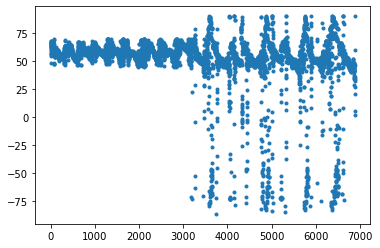

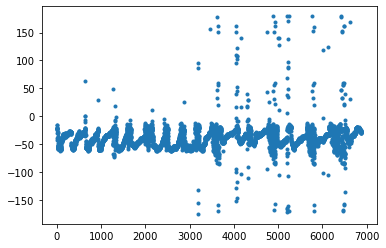

In [3]:
plt.plot(df_new['Latitude'], marker='.', linestyle ="")
plt.show()
plt.plot(df_new['Longitude'], marker='.', linestyle ="")
plt.show()

## Dividing the data set, for differing TagID, and then preprocessing by getting rid of dupicate dates (by averaging values) and also applying the index as the total date range
### Returning the length of the index to understand the amount of observations for each TagID 

In [4]:
def preprocessing(df):

    #iterate through the data sheet and take averages of those with matching dates 
    #with matching tagid

    df_dic_lat ={}
    df_dic_long ={}

    #print(w1_df.index)

    for i in df.index:
        if df["Date"][i] not in df_dic_lat:
            df_dic_lat[df["Date"][i]] = [df["Latitude"][i]]
            df_dic_long[df["Date"][i]] = [df["Longitude"][i]]
        else:
            df_dic_lat[ df["Date"][i]] += [df["Latitude"][i]]
            df_dic_long[ df["Date"][i]] += [df["Longitude"][i]]

    #df_dic_lat #shows up to 3 copies of 1 date

    for i in df_dic_lat:
        df_dic_lat[i] =  round(mean(df_dic_lat[i]),3) #np.min(df_dic_lat[i])
        df_dic_long[i] = round(mean(df_dic_long[i]),3) #np.min(df_dic_long[i])

    df2 = pd.DataFrame.from_dict({"Date": df_dic_lat.keys() ,"Latitude":df_dic_lat.values(), "Longitude":df_dic_long.values()})

    #Applying the date as the index as a datetime object 
    
    df2.set_index("Date", inplace=True, drop=True)
    df2.index = pd.to_datetime(df2.index)
    #Add missign dates with nan value for graph 

    date_range = pd.date_range('15-07-2007', '18-02-2012') 

    df2 = df2.reindex(date_range)
   
    
    return df2

In [5]:
#Data set is accumulated at two sites Westman Island, and Flatey ISland

westman = ["V417151", "V484246", "V417146", "V417148", "V417149", "V484271", "V499278"] #using animal id

flatey = ["V485077", "V485241", "V485255" "V491716", "V485247", "V485249"]

westman_id = []
flatey_id =[]
c = 0             #checks the total count of all values 
w1=[]
w2=[]
w3=[]
w4=[]
w5=[]
w6=[]
w7=[]
f1=[]
f2=[]
f3=[]
f4=[]
f5=[]
f6=[]
for i in range(len(df)):
    if df_new["TagID"][i] in westman:
        westman_id.append(i)
        c+=1
        
        if df_new["TagID"][i] == "V417151" :
            w1.append(i)
        elif df_new["TagID"][i] == "V484246" :
            w2.append(i)
        elif df_new["TagID"][i] == "V417146" :
            w3.append(i)
        elif df_new["TagID"][i] == "V417148" :
            w4.append(i)
        elif df_new["TagID"][i] == "V417149" :
            w5.append(i)
        elif df_new["TagID"][i] == "V484271" :
            w6.append(i)  
        elif df_new["TagID"][i] == "V499278" :
            w7.append(i)  
        
    else: #df["TagID"][i] in flatey:
        flatey_id.append(i)
        c+=1
        if df_new["TagID"][i] == "V485077" :
            f1.append(i)
        elif df_new["TagID"][i] == "V485241" :
            f2.append(i)
        elif df_new["TagID"][i] == "V485255" :
            f3.append(i)
        elif df_new["TagID"][i] == "V491716" :
            f4.append(i)
        elif df_new["TagID"][i] == "V485247" :
            f5.append(i)
        elif df_new["TagID"][i] == "V485249" :
            f6.append(i)  
        
        
print(f"length of original dataframe {len(df)}, length of count check {c}") #checks that all values are divided
print(f"length of sum of individual tagID {sum ([len(w1), len(w2), len(w3), len(w4), len(w5), len(w6), len(w7), len(f1), len(f2), len(f3), len(f4), len(f5), len(f6)])}")

#Creates data frames for each IDTag, so can be preprocessed by averaging values on a date, and changing index to cover all dates
#for the span of the dataset
westman_df = df_new.iloc[westman_id, :] #did not apply preprocessing as the dates for different tags would combine
w1_df = df_new.iloc[w1, :]
w2_df = df_new.iloc[w2, :]
w3_df = df_new.iloc[w3, :]
w4_df = df_new.iloc[w4, :]
w5_df = df_new.iloc[w5, :]
w6_df = df_new.iloc[w6, :]
w7_df = df_new.iloc[w7, :]

flatey_df = df_new.iloc[flatey_id, :]
f1_df = df_new.iloc[f1, :]
f2_df = df_new.iloc[f2, :]
f3_df = df_new.iloc[f3, :]
f4_df = df_new.iloc[f4, :]
f5_df = df_new.iloc[f5, :]
f6_df = df_new.iloc[f6, :]

w1_df2 = preprocessing(w1_df)
w2_df2 = preprocessing(w2_df)
w3_df2 = preprocessing(w3_df)
w4_df2 = preprocessing(w4_df)
w5_df2 = preprocessing(w5_df)
w6_df2 = preprocessing(w6_df)
w7_df2 = preprocessing(w7_df)

f1_df2 = preprocessing(f1_df)
f2_df2 = preprocessing(f2_df)
f3_df2 = preprocessing(f3_df)
f4_df2 = preprocessing(f4_df)
f5_df2 = preprocessing(f5_df)
f6_df2 = preprocessing(f6_df)


print([len(w1), len(w2), len(w3), len(w4), len(w5), len(w6), len(w7), len(f1), len(f2), len(f3), len(f4), len(f5), len(f6)])

#selected data sets for westman w6
#selected data sets for flatey f1 


length of original dataframe 6881, length of count check 6881
length of sum of individual tagID 6881
[258, 621, 479, 680, 596, 697, 366, 1318, 332, 366, 327, 484, 357]


## Graph of the datasets Westman and Flatey (the two locations) against standard index value

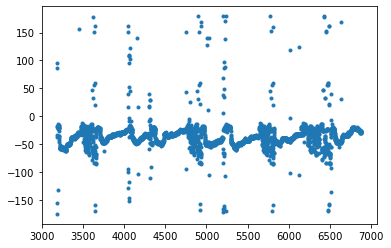

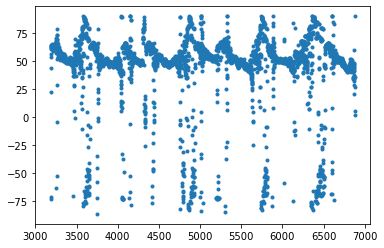

In [6]:
plt.plot(westman_df['Longitude'], marker='.', linestyle ="")
plt.show()
plt.plot(westman_df['Latitude'], marker='.', linestyle ="")


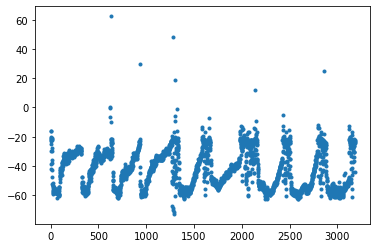

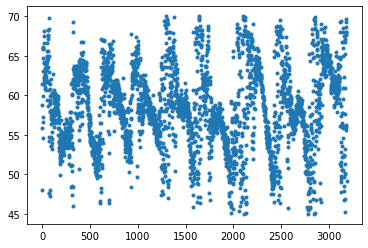

In [7]:
plt.plot(flatey_df['Longitude'], marker='.', linestyle ="")
plt.show()
plt.plot(flatey_df['Latitude'], marker='.', linestyle ="")


In [8]:
#one step only changign index (preprocessing changes index to the total data range, and removes 
#duplicate dates by taking the mean, this could be detremental for the dataset as it averages different different animals)
'''
flatey_df.set_index("Date", inplace=True, drop=True)
flatey_df.index = pd.to_datetime(flatey_df.index)
        
    #Add missign dates with nan value for graph 

plt.plot(flatey_df['Longitude'], marker='.', linestyle ="")
'''

'\nflatey_df.set_index("Date", inplace=True, drop=True)\nflatey_df.index = pd.to_datetime(flatey_df.index)\n        \n    #Add missign dates with nan value for graph \n\nplt.plot(flatey_df[\'Longitude\'], marker=\'.\', linestyle ="")\n'

## Graph of Flatey and Westman graph after preprocessing, using the date on the x axis

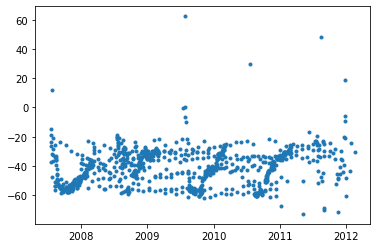

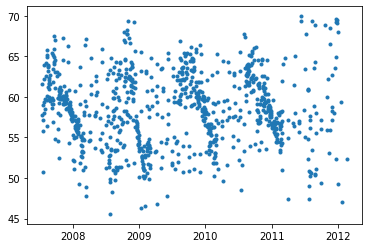

'\nflatey_df2 = flatey_df2.reset_index().dropna().set_index(\'index\')\nflatey_df2.index = pd.to_datetime(flatey_df2.index)\n#flatey_df2.set_index("index", inplace=True, drop=True)\n'

In [9]:
flatey_df2 = preprocessing(flatey_df)

plt.plot(flatey_df2['Longitude'], marker='.', linestyle ="")
plt.show()
plt.plot(flatey_df2['Latitude'], marker='.', linestyle ="")
plt.show()

#Got rid of nan values and index for nan values 
'''
flatey_df2 = flatey_df2.reset_index().dropna().set_index('index')
flatey_df2.index = pd.to_datetime(flatey_df2.index)
#flatey_df2.set_index("index", inplace=True, drop=True)
'''

#flatey_df2 = flatey_df2.interpolate(method='linear', limit_direction='forward', axis=0)
#print(flatey_df2.head(20))
#flatey_df2.to_csv("flatey_pre2.csv")


#print(flatey_df2.index)


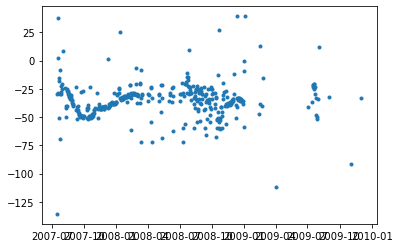

407


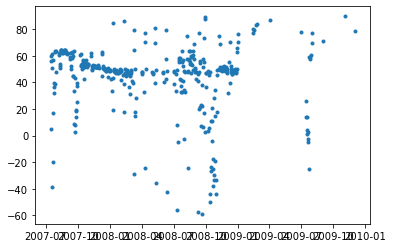

In [10]:
westman_df2 = preprocessing(westman_df)

plt.plot(westman_df2['Longitude'], marker ='.', linestyle ="")
plt.show()
print(len(westman_df2.dropna()))
plt.plot(westman_df2['Latitude'], marker ='.', linestyle ="")

## Applying the seasonal_decompose operation 
This was made in the aim of simplifying the data for arima application.
Have focused on the trend portion of the output.
Tested with a few periods, 90 appeared to give a good trend.  

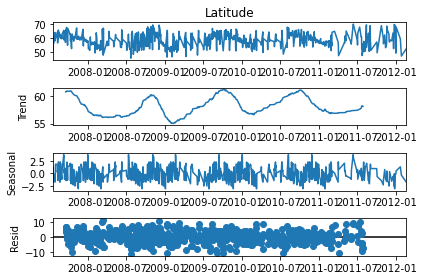

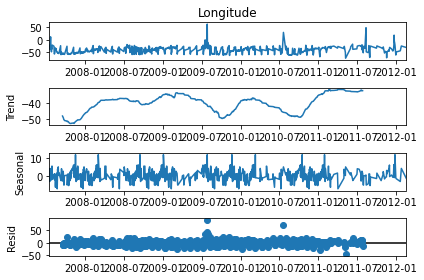

In [11]:
seas_flat_lat=sm.tsa.seasonal_decompose(x = flatey_df2['Latitude'].dropna(), period = 90 )

fig=seas_flat_lat.plot()
fig.set_figheight(4)
plt.show()

#print(seas_flat_lat.trend.dropna())

seas_flat_long=sm.tsa.seasonal_decompose(x = flatey_df2['Longitude'].dropna(), period = 90 )

fig=seas_flat_long.plot()
fig.set_figheight(4)
plt.show()

#print(seas_flat_lat.trend.to_frame().head(60))  #returned data isnt equidistant



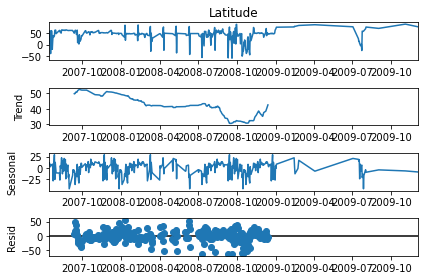

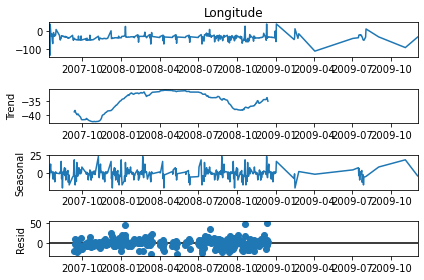

In [12]:
seas_west_lat=sm.tsa.seasonal_decompose(x = westman_df2['Latitude'].dropna(), period = 90 )

fig=seas_west_lat.plot()
fig.set_figheight(4)
plt.show()

#print(seas_flat_lat.trend.dropna())

seas_west_long=sm.tsa.seasonal_decompose(x = westman_df2['Longitude'].dropna(), period = 90 )

fig=seas_west_long.plot()
fig.set_figheight(4)
plt.show()

## First attempt at the Arima Model

### Relied on the interaction by the operator for inserting p and q based on produced graphs, d is generated automatically.

#### Note this is only set up to do one differentiation. 

In [13]:
#first interactive arima model using the graphs to decide p and q, and usign response from adfuller for d 
#no longer used 

def arima_model(date, position):
    
    '''Creates an interactive Arima model, relying on inputs from the operator for p and q to model'''
    
    result = adfuller(position.dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    
    if result[1] < 0.05:
        d = 0
    else:
        plt.plot(position.diff().dropna())
        plt.show()
        plot_acf(position.diff().dropna())
        plt.show()
        evaluation = input("Is the 5th peak within the bounds (yes or no)")
        if evaluation == "Yes" or "yes":
            d = 1
        #this is where the else for no would be if needing more differentiating 
    
    if d ==0:
        plot_acf(position.dropna())
        plt.show()
        p = int(input("Which is the first peak within the bounds (must be an integer)"))
        plot_pacf(position.dropna())
        plt.show()
        q = int(input("Which is the first peak within the bounds (must be an integer)"))
        
    elif d==1:
        plot_acf(position.diff().dropna())
        plt.show()
        p = int(input("Which is the first peak within the bounds (must be an integer)"))
        plot_pacf(position.diff().dropna())
        plt.show()
        q = int(input("Which is the first peak within the bounds (must be an integer)"))
    
    
    model = ARIMA(position.dropna(), order=(p,d,q))
    model_fit = model.fit()
    print(model_fit.summary())

In [15]:
#Attempts being made with arima model before switching to auto arima
'''
#arima_model(westman_df.index, westman_df["Latitude"])

#doesn't give a good model, will have to split into separate groups



arima_model(w1_df2.index, w1_df2["Latitude"])

frames = [w1_df2, w2_df2, w3_df2, w4_df2, w5_df2, w6_df2, w7_df2]

for frame in frames:
    arima_model(frame.index, frame["Latitude"])
        
'''
""

''

## Splitting the data sets to be applied to the  auto_arima models later 

### Chosen datasets are: 
- w2 (TagID "V484246") - choen as it had a good spread of data inspected visually) 
- w4 (TagID "V417148") - chosen as it had the most observations, but had issues with continuity as can be seen in the graph below
- Flatey data set after preprocessing (it is imperative to me to have the time series element as the index otherwise the information is useless) 
- Flatey data set trend after going through seasonal decomposition

### These datasets are focused on Latitude for reasons of practice, and also the trend in the graphs above appear to be stronger in Latitude 



Total amount of non nan opservations:  317
Total amount of non nan opservations after split in training:  231
Total amount of non nan opservations after split in test:  86


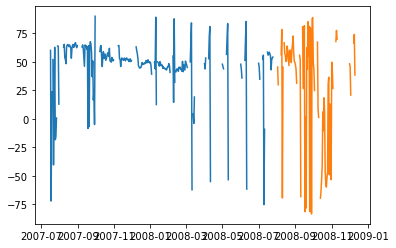

In [14]:
#w2
#Split into test and training 
#Looking at the raw data 1/6/2008 seems a good splitting point

print("Total amount of non nan opservations: ",len(w2_df2["Latitude"].dropna())) #full count of useful data

w2_df2_train = w2_df2[:"08/01/2008"]
w2_df2_test = w2_df2["08/02/2008":]

print("Total amount of non nan opservations after split in training: ",len(w2_df2_train["Latitude"].dropna())) #full count of useful data
print("Total amount of non nan opservations after split in test: ",len(w2_df2_test["Latitude"].dropna())) #full count of useful data
plt.plot(w2_df2_train["Latitude"],label="Training")
plt.plot(w2_df2_test["Latitude"],label="Test")

Total amount of non nan opservations:  390
Total amount of non nan opservations after split in training:  258
Total amount of non nan opservations after split in test:  132


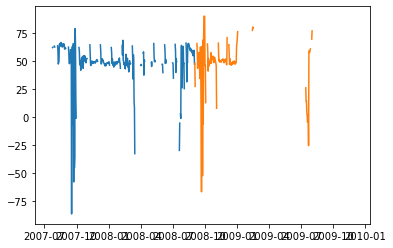

In [15]:
#w4
#Split into test and training 
#Looking at the raw data 1/6/2008 seems a good splitting point

print("Total amount of non nan opservations: ",len(w4_df2["Latitude"].dropna())) #full count of useful data

w4_df2_train = w4_df2[:"09/01/2008"]
w4_df2_test = w4_df2["09/02/2008":]

print("Total amount of non nan opservations after split in training: ",len(w4_df2_train["Latitude"].dropna())) #full count of useful data
print("Total amount of non nan opservations after split in test: ",len(w4_df2_test["Latitude"].dropna())) #full count of useful data
plt.plot(w4_df2_train["Latitude"],label="Training")
plt.plot(w4_df2_test["Latitude"],label="Test")

Total amount of non nan opservations:  905
Total amount of non nan opservations after split in training:  692
Total amount of non nan opservations after split in test:  213


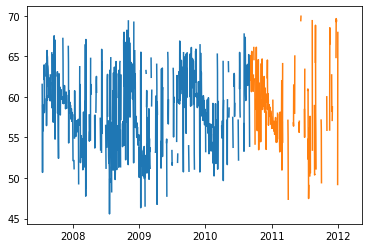

In [16]:
#Flatey
print("Total amount of non nan opservations: ",len(flatey_df2["Latitude"].dropna())) #full count of useful data


flatey_df2_train = flatey_df2[:"09/03/2010"]
flatey_df2_test = flatey_df2["09/04/2010":]

print("Total amount of non nan opservations after split in training: ",len(flatey_df2_train["Latitude"].dropna())) #full count of useful data
print("Total amount of non nan opservations after split in test: ",len(flatey_df2_test["Latitude"].dropna())) #full count of useful data

plt.plot(flatey_df2_train["Latitude"],label="Training")
plt.plot(flatey_df2_test["Latitude"],label="Test")


#flatey_df2 = flatey_df2[flatey_df2.index.notnull()]
'''
flatey_df2 = flatey_df2.reset_index().dropna().set_index('index')
flatey_df2.index = pd.to_datetime(flatey_df2.index)
'''
#flatey_df2.set_index("index", inplace=True, drop=True)


#interpolatign the raw data 
#Creates same issue in gretl with being  non positive matrix 
'''
lat = flatey_df2["Longitude"].values.tolist()
lat = interpolation(lat)
long = flatey_df2["Longitude"].values.tolist()
long = interpolation(long)
flatey_df2["Longitude"] = long
flatey_df2["Latitude"] = lat
'''

#flatey_df2 = flatey_df2['17-07-2007': '26-01-2011']
flatey_df2.to_csv("flatey_pre.csv")


#print(flatey_df2)

Total amount of non nan opservations:  815
Total amount of non nan opservations after split in training:  673
Total amount of non nan opservations after split in test:  142


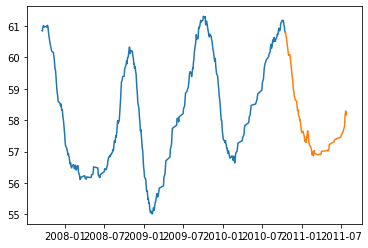

In [17]:
#flatey lat trend


flatey_lat_trend = seas_flat_lat.trend.to_frame()

flatey_lat_trend.to_csv("flatey_lat_trend.csv")

flatey_long_trend = seas_flat_long.trend.to_frame()
flatey_lat_trend.to_csv("flatey_long_trend.csv")


print("Total amount of non nan opservations: ",len(flatey_lat_trend["trend"].dropna()))

flatey_lat_trend_train = flatey_lat_trend[:"10/15/2010"]
flatey_lat_trend_test = flatey_lat_trend["10/16/2010":]      #adjusted date range to be beyond peak

print("Total amount of non nan opservations after split in training: ", len(flatey_lat_trend_train["trend"].dropna())) #full count of useful data
print("Total amount of non nan opservations after split in test: ",len(flatey_lat_trend_test["trend"].dropna())) #full count of useful data

plt.plot(flatey_lat_trend_train["trend"],label="Training")
plt.plot(flatey_lat_trend_test["trend"],label="Test")


flatey_lat_trend["Longitude"] = flatey_long_trend["trend"]
flatey_lat_trend.rename(columns = {"trend":"Latitude"}, inplace = True)

#flatey_lat_trend["Temperature"] = df2["Temperature"]

flatey_lat_trend.to_csv("flatey_trend.csv")



## Applied Arima model 
### Applied model to:
- w2 latitude (auto arima) 
- w4 latitude (auto arima) 
- flatey latitude preprocessed (auto arima) 
- flatey latitude seasonal trend data (auto arima) 
- flatey latitude seasonal trend date (arima - using model specifications from auto arima) - not sarimax, as i wished to use predict()
- flatey longitude preprocessed (auto arima) 



                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  231
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1066.622
Date:                Tue, 14 Jun 2022   AIC                           2141.245
Time:                        17:21:48   BIC                           2155.014
Sample:                             0   HQIC                          2146.798
                                - 231                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.3882      2.790      1.214      0.225      -2.081       8.857
ar.L1          0.9262      0.062     15.008      0.000       0.805       1.047
ma.L1         -0.8428      0.085     -9.940      0.0

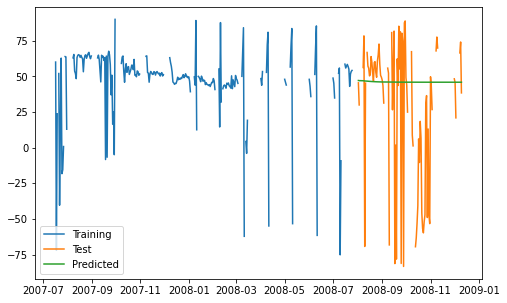

In [18]:
#w2 latitude
#auto arima

model = pm.arima.auto_arima(w2_df2_train["Latitude"].dropna(), D=1) #seasonal = True
print(model.summary())

prediction = pd.DataFrame(model.predict(n_periods = len(w2_df2_test.dropna())),index=w2_df2_test.dropna().index)
prediction.columns = ['predicted_latitude']
#print(prediction)

plt.figure(figsize=(8,5))
plt.plot(w2_df2_train["Latitude"],label="Training")
plt.plot(w2_df2_test["Latitude"],label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'lower left')
plt.show()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  258
Model:               SARIMAX(3, 0, 3)   Log Likelihood               -1109.773
Date:                Tue, 14 Jun 2022   AIC                           2235.545
Time:                        17:22:17   BIC                           2263.969
Sample:                             0   HQIC                          2246.975
                                - 258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     21.4230     13.998      1.530      0.126      -6.013      48.859
ar.L1         -0.6525      0.201     -3.245      0.001      -1.047      -0.258
ar.L2          0.6124      0.142      4.311      0.0

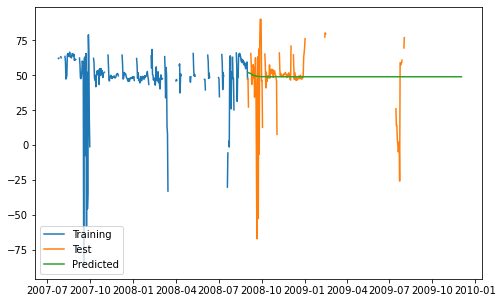

In [19]:
#w4 latitude
#auto_atima 
#maybe sarima is better as there is seasonal data. 

#chosen data set w4 -best pattern

model = pm.arima.auto_arima(w4_df2_train["Latitude"].dropna(), D=1) #seasonal = True
#model_fit = model.fit(w4_df2["Latitude"])
print(model.summary())

prediction = pd.DataFrame(model.predict(n_periods = len(w4_df2_test.dropna())),index=w4_df2_test.dropna().index)
prediction.columns = ['predicted_latitude']
#print(prediction)

plt.figure(figsize=(8,5))
plt.plot(w4_df2_train["Latitude"],label="Training")
plt.plot(w4_df2_test["Latitude"],label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'lower left')
plt.show()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  692
Model:               SARIMAX(1, 0, 4)   Log Likelihood               -1902.100
Date:                Mon, 23 May 2022   AIC                           3818.200
Time:                        13:09:27   BIC                           3849.977
Sample:                             0   HQIC                          3830.490
                                - 692                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.9343      1.118      2.625      0.009       0.744       5.125
ar.L1          0.9496      0.019     49.274      0.000       0.912       0.987
ma.L1         -0.6605      0.035    -18.643      0.0

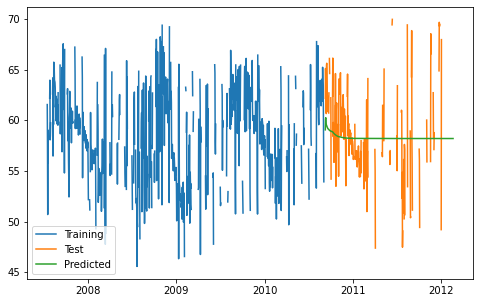

In [32]:
#flatey latitude

model = pm.arima.auto_arima(flatey_df2_train["Latitude"].dropna(), m= 1, seasonal = True, test ="adf", \
                            error_action = "ignore", suppress_warnings = True, stepwise = True) #trace = True, seasonal = True


#model_fit = model.fit()
print(model.summary())
prediction = pd.DataFrame(model.predict(n_periods = len(flatey_df2_test.dropna())),index=flatey_df2_test.dropna().index)
prediction.columns = ['predicted_latitude']
#print(prediction)
plt.figure(figsize=(8,5))
plt.plot(flatey_df2_train["Latitude"],label="Training")
plt.plot(flatey_df2_test["Latitude"],label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'lower left')
plt.show()

C:\Users\danie\AppData\Roaming\Python\Python38\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (6) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  673
Model:               SARIMAX(1, 0, 3)   Log Likelihood                1312.347
Date:                Tue, 14 Jun 2022   AIC                          -2612.695
Time:                        17:22:39   BIC                          -2585.624
Sample:                             0   HQIC                         -2602.212
                                - 673                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6864      0.137      5.028      0.000       0.419       0.954
ar.L1          0.9883      0.002    427.669      0.000       0.984       0.993
ma.L1          1.3930      0.040     34.923      0.0

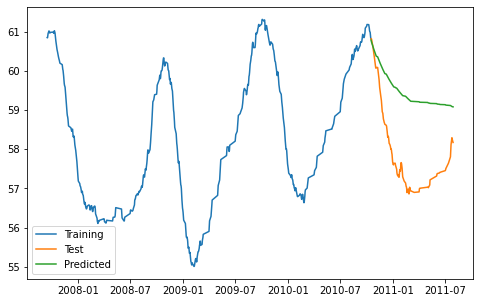

In [20]:
#flatey_lat_trend_train

model = pm.arima.auto_arima(flatey_lat_trend_train.dropna(), m= 6, seasonal = False, test ="adf", \
                            error_action = "ignore", suppress_warnings = True, stepwise = True) #trace =True, seasonal = True


#model_fit = model.fit()
print(model.summary())

## Residials

model.resid()


prediction = pd.DataFrame(model.predict(n_periods = len(flatey_lat_trend_test.dropna())),index=flatey_lat_trend_test.dropna().index)
prediction.columns = ['predicted_latitude']
#print(prediction)
plt.figure(figsize=(8,5))
plt.plot(flatey_lat_trend_train,label="Training")
plt.plot(flatey_lat_trend_test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'lower left')
plt.show()

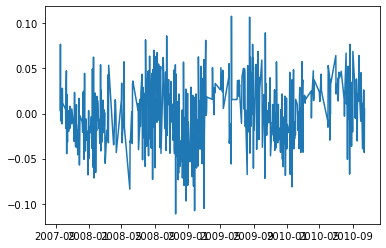

In [21]:
plt.plot(flatey_lat_trend_train.dropna().index[1:], model.resid()[1:] )

#model.resid()

C:\Users\danie\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danie\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danie\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danie\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting p

                               SARIMAX Results                                
Dep. Variable:                  trend   No. Observations:                  673
Model:                 ARIMA(1, 0, 3)   Log Likelihood                1330.769
Date:                Tue, 14 Jun 2022   AIC                          -2649.539
Time:                        17:23:07   BIC                          -2622.468
Sample:                             0   HQIC                         -2639.055
                                - 673                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.9140      2.950     20.308      0.000      54.132      65.696
ar.L1          0.9982      0.002    404.173      0.000       0.993       1.003
ma.L1          1.4466      3.969      0.364      0.7

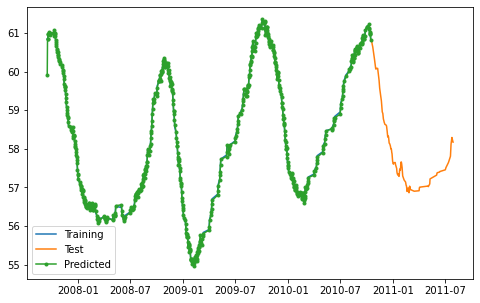

C:\Users\danie\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


      lower trend  upper trend
673     60.726954    60.856855
674     60.606821    60.949767
675     60.510600    61.043493
676     60.429873    61.121077
677     60.364381    61.183432
...           ...          ...
1158    56.940700    63.603094
1159    56.938799    63.603693
1160    56.936903    63.604287
1161    56.935014    63.604878
1162    56.933131    63.605465

[490 rows x 2 columns]


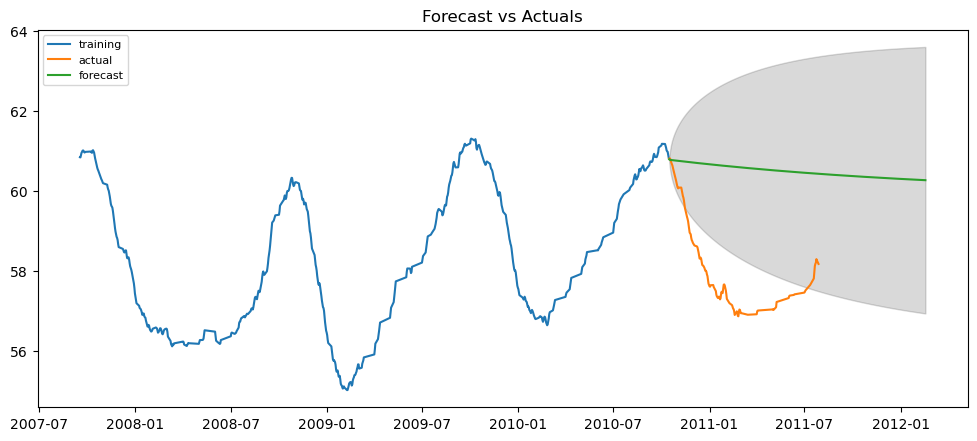

In [22]:
#flatey_lat_trend_train
#This use the predictors for the above model, and applies an ARIMA model 

model = ARIMA(flatey_lat_trend_train.dropna(), order=(1,0,3))
model_fit = model.fit()
print(model_fit.summary())
#prediction = pd.DataFrame(model.predict(n_periods = len(flatey_lat_trend_test.dropna())),index=flatey_lat_trend_test.dropna().index)
prediction = pd.DataFrame(model_fit.predict(Dynamic = True))

prediction.columns = ['predicted_trend_latitude']

plt.figure(figsize=(8,5))
plt.plot(flatey_lat_trend_train["trend"],label="Training")
plt.plot(flatey_lat_trend_test["trend"],label="Test")
plt.plot(prediction,label="Predicted", marker = ".")
plt.legend(loc = 'lower left')
plt.show()


d1 = datetime.datetime(2010, 10, 16)#(2010, 9, 2) 
d2 = datetime.datetime(2012, 2, 18)
diff = d2-d1
diff.days

forecast = model_fit.get_forecast(diff.days, alpha=0.05)  # 95% conf #was forecast!!!

print(forecast.conf_int())

lower_series = forecast.conf_int()["lower trend"]#, index=flatey_lat_trend_test.index
lower_series = lower_series.to_frame()
lower_series["Date"] = pd.date_range(start = "10/16/2010", end = "02/17/2012")
lower_series.set_index("Date", inplace=True, drop=True)

upper_series = forecast.conf_int()["upper trend"]#, index=flatey_lat_trend_test.index
upper_series = upper_series.to_frame()
upper_series["Date"] = pd.date_range(start = "10/16/2010", end = "02/17/2012")
upper_series.set_index("Date", inplace=True, drop=True)


forecast = forecast.predicted_mean

forecast = forecast.to_frame()
forecast['Date'] = pd.date_range(start = "10/16/2010", end = "02/17/2012")
forecast.set_index("Date", inplace=True, drop=True)


# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(flatey_lat_trend_train, label='training')
plt.plot(flatey_lat_trend_test, label='actual')
plt.plot(forecast["predicted_mean"], label='forecast')
plt.fill_between(lower_series.index, lower_series["lower trend"], upper_series["upper trend"], color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  905
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -3402.345
Date:                Mon, 23 May 2022   AIC                           6810.690
Time:                        13:51:23   BIC                           6825.111
Sample:                             0   HQIC                          6816.198
                                - 905                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3203      0.024     13.443      0.000       0.274       0.367
ma.L1         -0.9152      0.015    -61.154      0.000      -0.945      -0.886
sigma2       108.6424      1.840     59.052      0.0

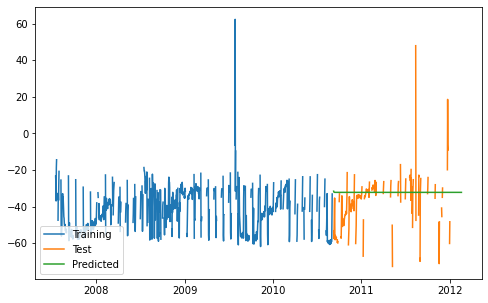

In [41]:
#flatey longitude

model = pm.arima.auto_arima(flatey_df2["Longitude"].dropna(), D=1) #seasonal = True


#model_fit = model.fit()
print(model.summary())
prediction = pd.DataFrame(model.predict(n_periods = len(flatey_df2_test.dropna())),index=flatey_df2_test.dropna().index)
prediction.columns = ['predicted_longitude']
#print(prediction)
plt.figure(figsize=(8,5))
plt.plot(flatey_df2_train["Longitude"],label="Training")
plt.plot(flatey_df2_test["Longitude"],label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'lower left')
plt.show()

## Gretl Models using the same data

I found using Gretl models for the time series was very useful, in terms of assessing the residuals. This made it easy to apply seasonal properties and auto for multivariate analysis, as I was unable to find any obvious libraries in Python. 

## Univariate Arima Model Flatey_Lat_Trend

### The image below shows the output for the generated model using Arima 103
![Arima103](flatey_lat_trend_arima103.png)

### The next image is the regression for this model
![Arima103_resid](flatey_lat_trend_arima103_resid.png)

### As can be seen there are some unexplained trends with this model. So next is attemped a seasonal arima model with 103, 103 (or ARMA(1,3) with Seasonal ARMA(1,3))
![Arima103_seasonal103](flatey_lat_trend_arima103_seasonal103.png)

### And the residuals:
![Arima103_seasonal103_resid](flatey_lat_trend_arima103_seasonal103_resid.png)



### This can be seen to be less caotic, residually, the forecast from this model can be seen here:
![Arima103_seasonal103_fore](flatey_lat_trend_arima103_seasonal103_fore.png)




## Multivariate Autoregressive Model Flatey Trend (both latitude and longitude) with VAR Lag of 9, between BIC = Schwarz Bayesian criterion and HQC = Hannan-Quinn criterion.

### The residuals are as follows (the model desription was a bit long and thus not included) 
![autoregressive_resid](flatey_trend_multi_resid.png)

### Forecast for this model for Latitude 
![autoregressive_lat_fore](flatey_trend_multi_lat_fore.png)

### Forecast for this model for Longitude 
![autoregressive_long_fore](flatey_trend_multi_long_fore.png)

### The next model i wished to apply was adding water temperatures as an exogenous variable

### Data set is for a larger range, but i focused on the desired range. Also unfortunately this is a deep water temperature, and i think the Sandeel population would be active higher. 

### Data preparation for this

### For the gretl autoregressive model, i couldnt have blank values, so i interpolated the values from the previous not null value into the set. As well as the same preprocessing as before 

In [23]:
def interpolation(temp):
    '''send list called temp for linear interpolation'''
    stored_value = 0
    stored_value2 = 0 
    for i in range(len(temp)):
        if pd.isnull(temp[i]) == False:
            stored_value = temp[i]
            search = True
            j =0
            while search == True and i+j < len(temp)-1:
                j+=1
                if pd.isnull(temp[i+j]) == False:
                    stored_value2 = temp[i+j]
                    search = False
            if i+j < len(temp)-1:
                #print(temp[i+1], temp[i], stored_value2, stored_value, j)
                delta = (float(stored_value2) - float(stored_value))/j
                temp[i+1] = float(temp[i])+delta
                
                
    return temp

## Deep water set 

From <https://www.ncei.noaa.gov/access/ocean-carbon-acidification-data-system/oceans/Moorings/Iceland_Sea.html>

In [24]:
#Preprocessing sea temp data same as lat long data

sea_temp_df = pd.read_csv("IcelandSea.csv", sep= ",", names=("Date", "Temperature"), header=1)

df_dic_temp ={}
for i in sea_temp_df.index:
    if sea_temp_df["Date"][i] not in df_dic_temp:
        df_dic_temp[sea_temp_df["Date"][i]] = [sea_temp_df["Temperature"][i]]
    else:
        df_dic_temp[ sea_temp_df["Date"][i]] += [sea_temp_df["Temperature"][i]]

for i in df_dic_temp:
    df_dic_temp[i] =  round(mean(df_dic_temp[i]),3) #np.min(df_dic_lat[i])

sea_temp_df2 = pd.DataFrame.from_dict({"Date": df_dic_temp.keys() ,"Temperature":df_dic_temp.values()})


sea_temp_df2.set_index("Date", inplace=True, drop=True)
sea_temp_df2.index = pd.to_datetime(sea_temp_df2.index, format = "%Y%m%d")#.dt.strftime("%d/%m/%Y")

date_range = pd.date_range('15-07-2007', '17-02-2012') 

sea_temp_df2 = sea_temp_df2.reindex(date_range)

sea_temp_df2.dropna().head()

temp = sea_temp_df2["Temperature"].values.tolist()
#print(temp)

'''
#interpolation by using same value
stored_value = 0
for i in range(len(temp)):
    if pd.isnull(temp[i]) == False:
        stored_value = temp[i]
    temp[i] = stored_value  
'''
temp = interpolation(temp)
        

sea_temp_df2["Temperature"] = temp
#print(sea_temp_df2.head(60))

flatey_lat_trend["Temperature"] = sea_temp_df2["Temperature"]

flatey_lat_trend.to_csv("flatey_trend2.csv")

## Results from Gretl - Deep water set 

### Using the same setting as before (Lag 9) and also including the exogenous water temperature this is the residuals:
![exogenous_resid](flatey_trend_exogenous_multi_resid.png)

### From the model output you can see there is a decent probability of its includion in the model: 
####  _________ _________ __coefficient   std. error   t-ratio     p-value 
#### Temperature    0.00662285   0.00276717     2.393    0.0169    **


### This is the forecast for this model for Latitude
![exogenous_lat_fore](flatey_trend_exogenous_multi_lat.png)

### This is the forecast for this model for Longitude
![exogenous_long_fore](flatey_trend_exogenous_multi_long.png)

## North atlantic seas surface water temp

From <https://psl.noaa.gov/data/climateindices/list/> selecting NAO (North Atlantic Ocean) 

### Being unsure of the success of this it was tried this again with the north atlantic seas dataset, again looking for the desired range

### Appying linear interpolation to the model and preprocessing as before

In [25]:
import datetime

df = pd.read_csv("north_atlantic_seas.csv", names = ("Year","January", "February", "March", "April", "May", "June", "July", "August", "September", \
          "October", "November", "December"))


df.set_index("Year", inplace = True, drop = True )
#print(df)
#known range 2007 : 2012

dates = [2007, 2008, 2009, 2010, 2011, 2012]
months = {"January":1, "February":2, "March":3, "April":4, "May":5, "June":6, "July":7, "August":8, "September":9, \
          "October":10, "November":11, "December":12}

dic = {}
for i in df:
    #print(len(df[i]))
    for j in df[i]:
        for h in dates:
            month = months[i]
            #time = datetime.datetime(h,month,1)
            dic[(h,month,1)] = j 

df = pd.DataFrame.from_dict({"Date":dic.keys(), "Temperature":dic.values()})

df["Date"] = pd.to_datetime(df["Date"], format = "(%Y, %m, %d)")

#print(df) 72 elements at this stage 

#df2.index = pd.to_datetime(df2.index, format = "%Y%m%d")


df.set_index("Date", inplace=True, drop=True)


date_range = pd.date_range('15-07-2007', '18-02-2012')#('15-07-2007', '18-02-2012') "17/09/2007":"28/07/2011"

df = df.reindex(date_range)

#print(df) #1315 elemsnts

#Attempt at interpolcation by linear interpolation, also used a static change, with no result 

temp = df["Temperature"].values.tolist()
temp = interpolation(temp)
        
df["Temperature"] = temp
#print(df.head(60)) #still 1315 elements 
#df = df["Temperature"].interpolate(method='linear', limit_direction='forward', axis=0)


#Interpolationon the data to extend the range create problems in Gretl with a non positive matrix 
'''
#print(flatey_lat_trend) #815 rows with some rows missing 
flatey_lat_trend = flatey_lat_trend.reindex(date_range)
print(flatey_lat_trend) #1315

lat = flatey_lat_trend["Longitude"].values.tolist()
lat = interpolation(lat)
long = flatey_lat_trend["Longitude"].values.tolist()
long = interpolation(long)
flatey_lat_trend["Longitude"] = long
flatey_lat_trend["Latitude"] = lat
'''


flatey_lat_trend["Temperature"] = df["Temperature"]
#flatey_lat_trend = flatey_lat_trend['17-09-2007': '1-02-2011']
#print(flatey_lat_trend) #1204 after snip

#flatey_lat_trend = flatey_lat_trend.set_index(date_range)

flatey_lat_trend.to_csv("flatey_trend3.csv")


## Results from Gretl using NAO data set 

### Using the same setting as before (Lag 9) and also including the exogenous water temperature this is the residuals:
![exogenous2_resid](flatey_trend_exogenous2_multi_resid.png)

### From the model output you can see there is a decent probability of its includion in the model: 
####  _________ _________ __coefficient   std. error   t-ratio     p-value 
#### Temperature   −0.00299032   0.00203994    −1.466    0.1431 


### This is the forecast for this model for Latitude
![exogenous2_lat_fore](flatey_trend_exogenous2_multi_lat.png)

### This is the forecast for this model for Longitude
![exogenous2_long_fore](flatey_trend_exogenous2_multi_long.png)



## Conclusion

In conclusion we were able to forecast the migratory pattern for the atlantic puffins. We were also able to daw some parallel between temperatrue and their migratory patterns as described in the aim. I think the deep sea water data, gave a good model, but is misleading, but i have included it for interest. 